# Employee Turn Over

## Problem Statement

Hiring and retaining talents is a challenging task that requires time and cost. Small businesses generally spend 40% of their working hours on tasks that do not generate any income, for instance hiring employees. Companies spend around 15% of employee's salary to recruite a new candidate, which is a huge amount especially for large corporations with thousands of employees. In other side, it's hard to tell which top empolyees are planning to stay so the company can compensate them properly to retain them from quiting. If the company doesn't retain them, that will cost the company a lot of money for losing valuable talents, and time of work until the company actually replace them. In this case, HR team collected data of the employees, and approach Data team to develop a model that could predict which employees are more likely to quit.

## Objectives

To develop an accurate prediction model that could predict employee's retention. 

### Data Exploration

In [1]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import dataset
df_employee = pd.read_csv('D:\Projects\Data Science\Human_Resources.csv')

In [3]:
df_employee.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
# features information
df_employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
# descriptive statistics numerical features
df_employee.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
# checking the values of categorical features
print(df_employee['Attrition'].unique())
print(df_employee['OverTime'].unique())
print(df_employee['Over18'].unique())

['Yes' 'No']
['Yes' 'No']
['Y']


In [7]:
# replacing category into number
df_employee['Attrition'] = df_employee['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
df_employee['OverTime'] = df_employee['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)
df_employee['Over18'] = df_employee['Over18'].apply(lambda x: 1 if x == 'Y' else 0)

In [8]:
# checking missing values
print(df_employee.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Attrition'}>,
        <AxesSubplot:title={'center':'DailyRate'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'EmployeeCount'}>,
        <AxesSubplot:title={'center':'EmployeeNumber'}>,
        <AxesSubplot:title={'center':'EnvironmentSatisfaction'}>,
        <AxesSubplot:title={'center':'HourlyRate'}>,
        <AxesSubplot:title={'center':'JobInvolvement'}>],
       [<AxesSubplot:title={'center':'JobLevel'}>,
        <AxesSubplot:title={'center':'JobSatisfaction'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'MonthlyRate'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>],
       [<AxesSubplot:title={'center':'Over18'}>,
        <AxesSubplot:title={'center':'OverTime'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>,
       

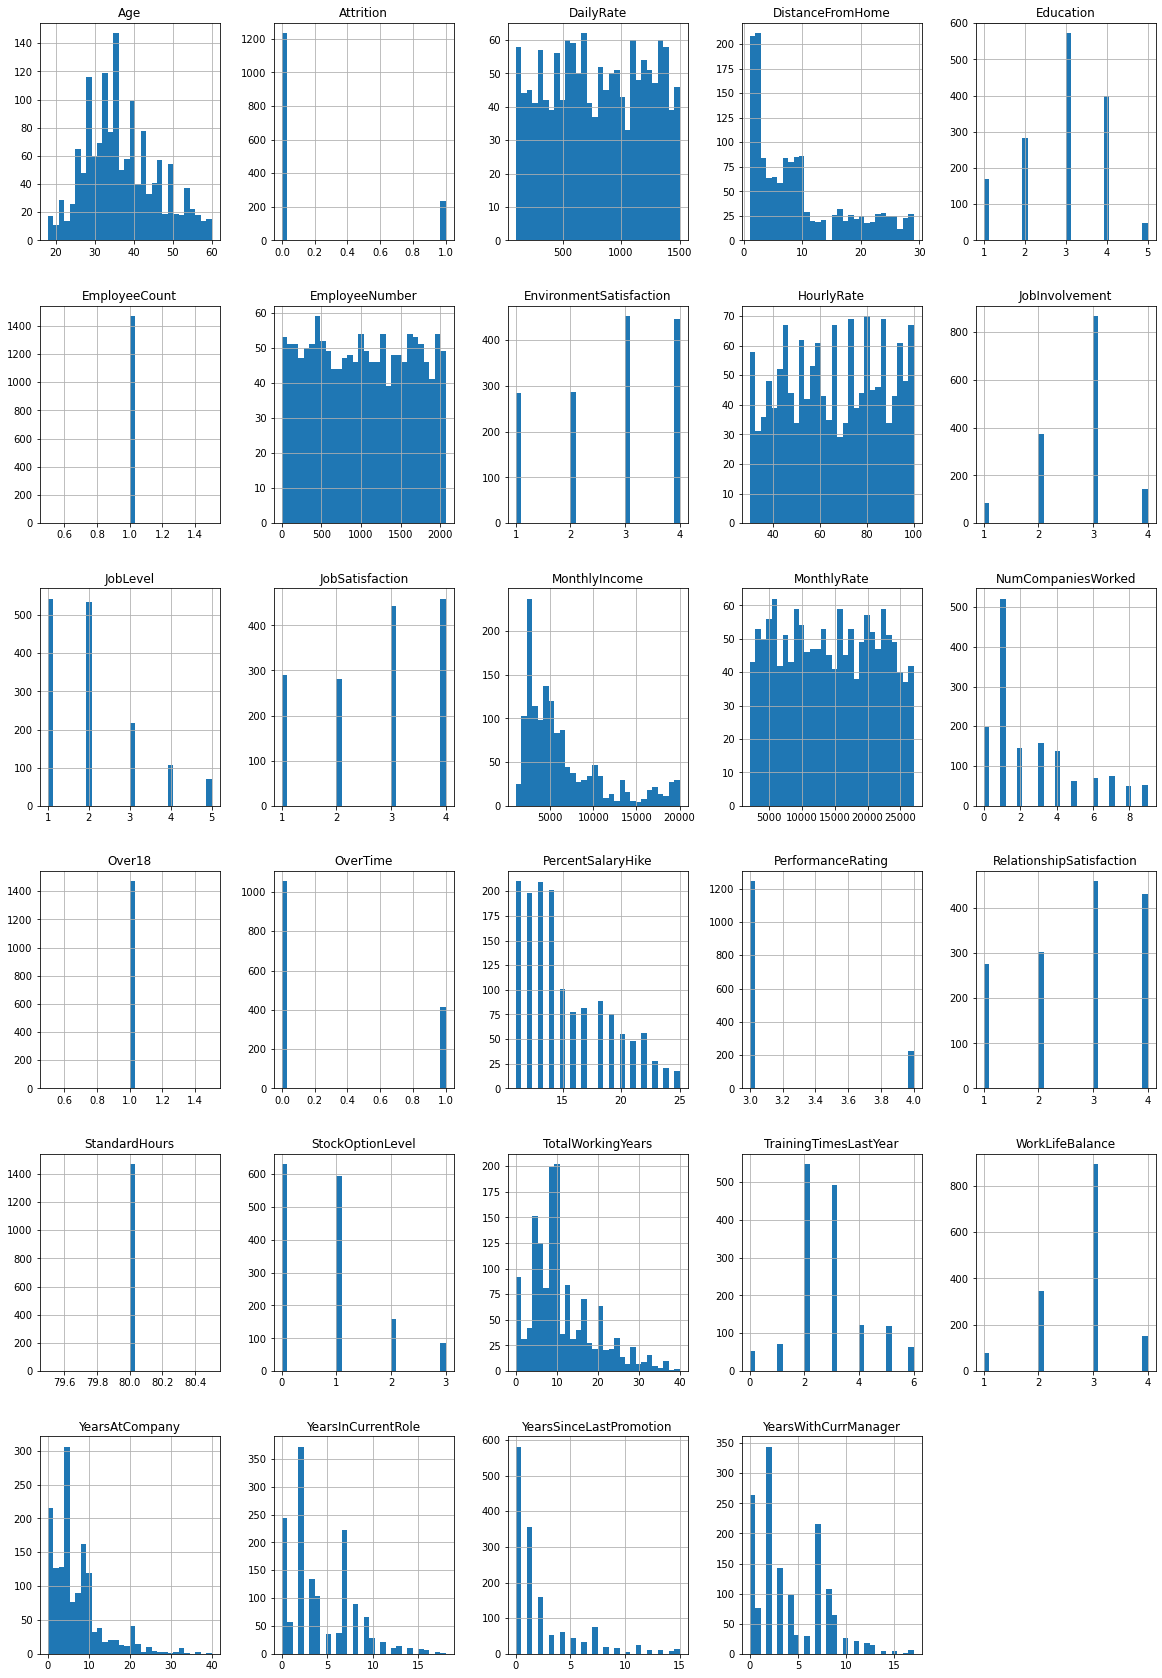

In [9]:
# visualize data distribution in histogram
df_employee.hist(bins=30, figsize=[20,30])

Several features such as MonthlyIncome, TotalWorkingYears are tail heavy

In [10]:
# drop EmployeeCount, StandardHours, Over18 columns because all employees have the same value, so including those columns will not make any sense in analysis
# drop EmployeeNumber column as well
df_employee.drop(['EmployeeCount', 'StandardHours', 'Over18','EmployeeNumber'], axis=1, inplace=True)

In [11]:
df_employee.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0


In [12]:
# checking the number of employee who have left and still stay
df_left_employee = df_employee[df_employee['Attrition'] == 1]
df_stayed_employee = df_employee[df_employee['Attrition'] == 0]

print('Total Employee : ', len(df_employee))
print('\nNumber of employee who have left : ', len(df_left_employee))
print('\n% of employee who have left :' , round(len(df_left_employee)/len(df_employee)*100, 2),'%')

Total Employee :  1470

Number of employee who have left :  237

% of employee who have left : 16.12 %


So, the percentage of employee who still stay is 83.88%, which means we're dealing with the imbalanced data

In [13]:
# compare descriptive statistics of the employee who have left and still stay

df_left_employee.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [14]:
df_stayed_employee.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


1. Mean 'Age' of the employee who stay is higher compared to who have left
2. 'DailyRate' of employee who stay is higher
3. Employees who stay live closer to home (DistanceFromHome)
4. Employees who stay are generally more satisfied with theor jobs (EnvironmentSatisfaction, JobSatisfaction)
5. Employees who stay tend to have higher stock option level (StockOptionLevel)

<AxesSubplot:>

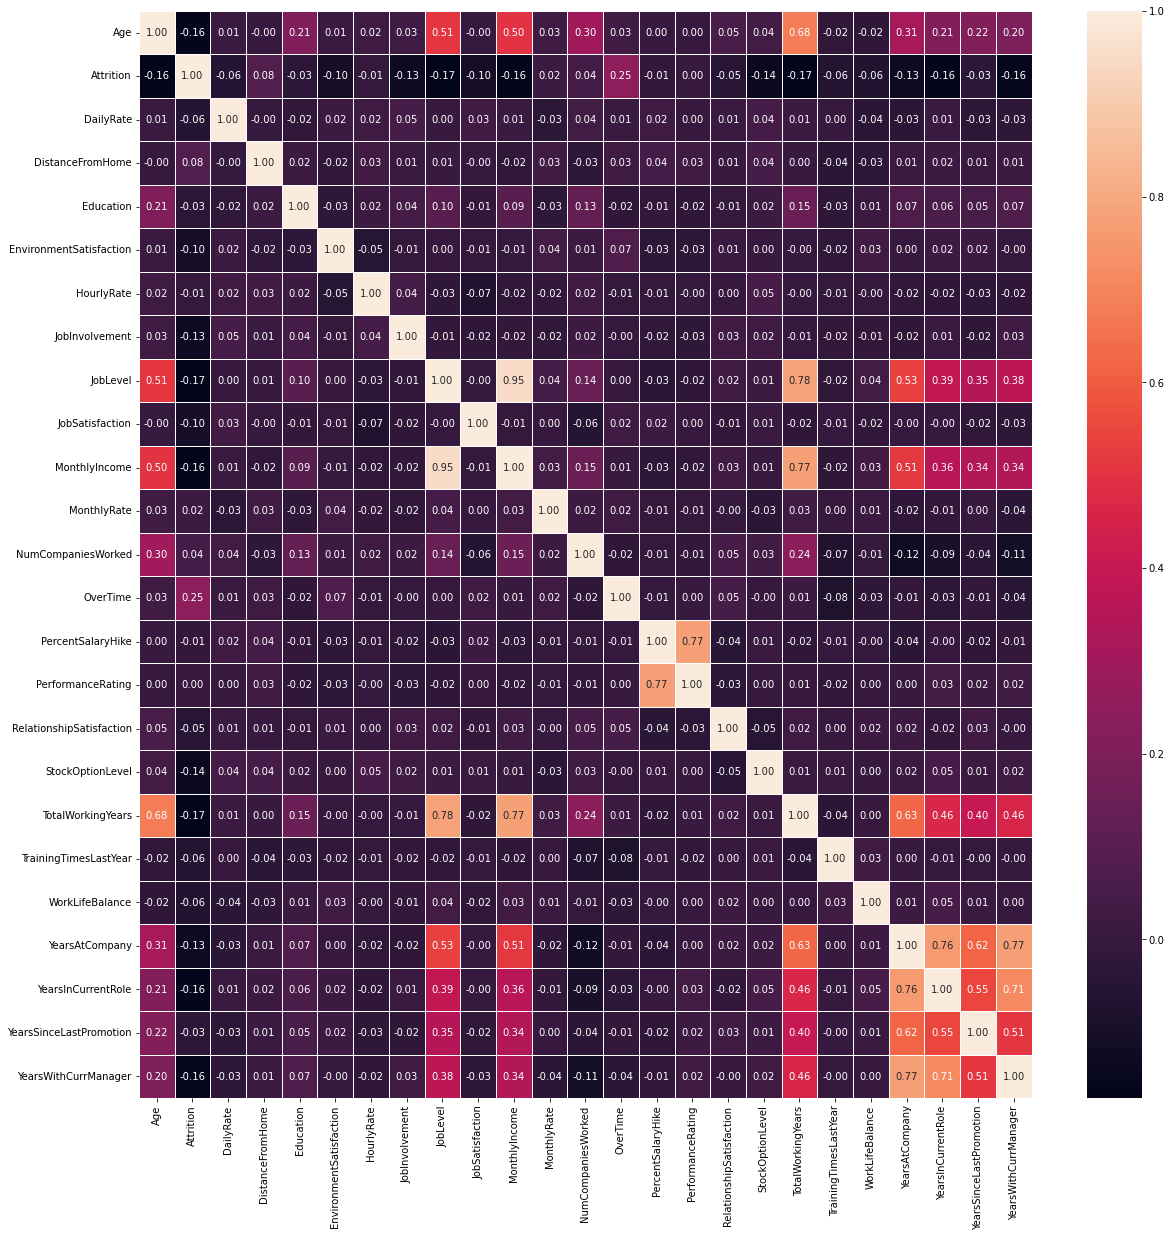

In [15]:
# checking the correlation between features
correlation = df_employee.corr()
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlation, annot=True, fmt=".2f", linewidth=1)

1. JobLevel is strongly positive correlated with MonthlyIncome and TotalWorkingYears
2. MonthlyIncome is strongly positive correlated with TotalWorkingYears
3. PerncentSalaryHike is strongly positive correlated with PerformanceRating
4. Age is strongly positive correlated with MonthlyIncome

<AxesSubplot:xlabel='Age', ylabel='count'>

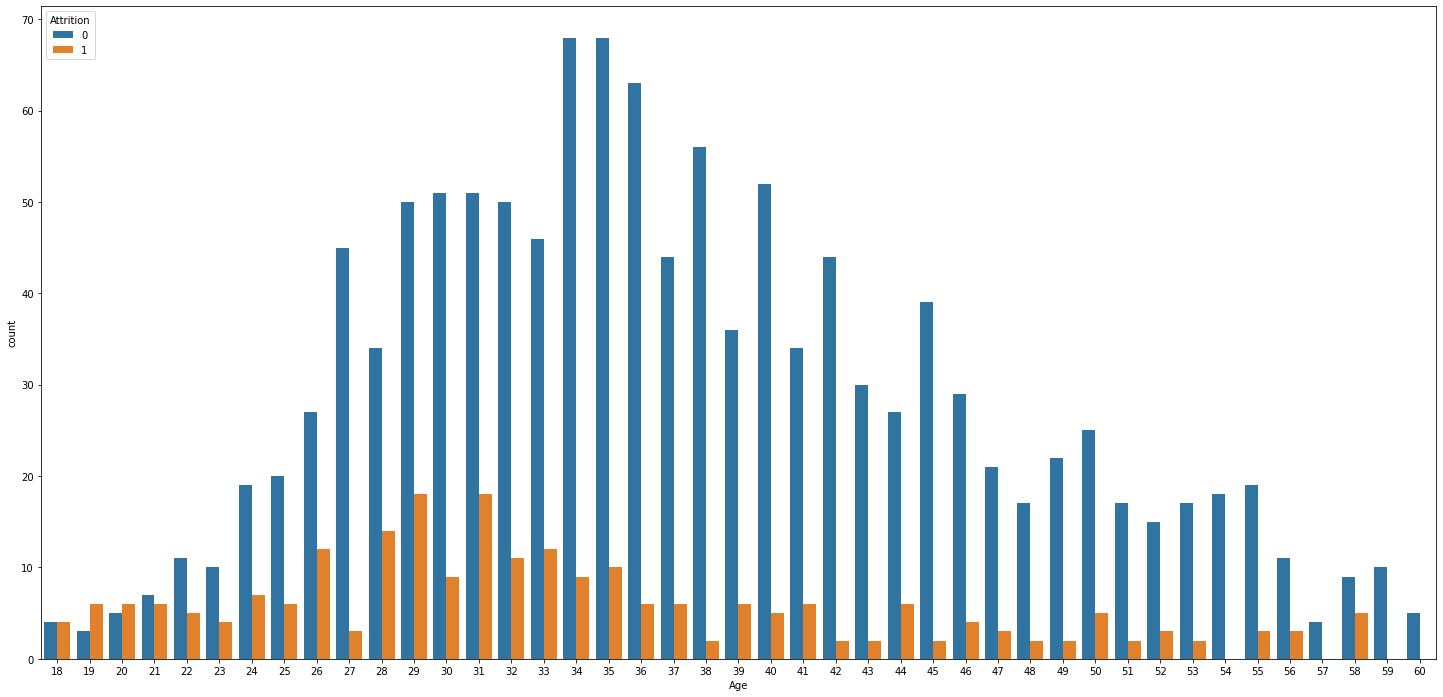

In [16]:
# checking the proportion of employee who have left and stay in Age
plt.figure(figsize=(25,12))
sns.countplot(x='Age', hue='Attrition', data=df_employee)

1. At age range 18-21, employees tend to leave the company (proportion of attrition = 1 is higher)
2. At age range 22-33, employees have relatively high proportion to leave the company
3. The older employees tend to stay in the company

In [17]:
df_employee.JobRole.unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

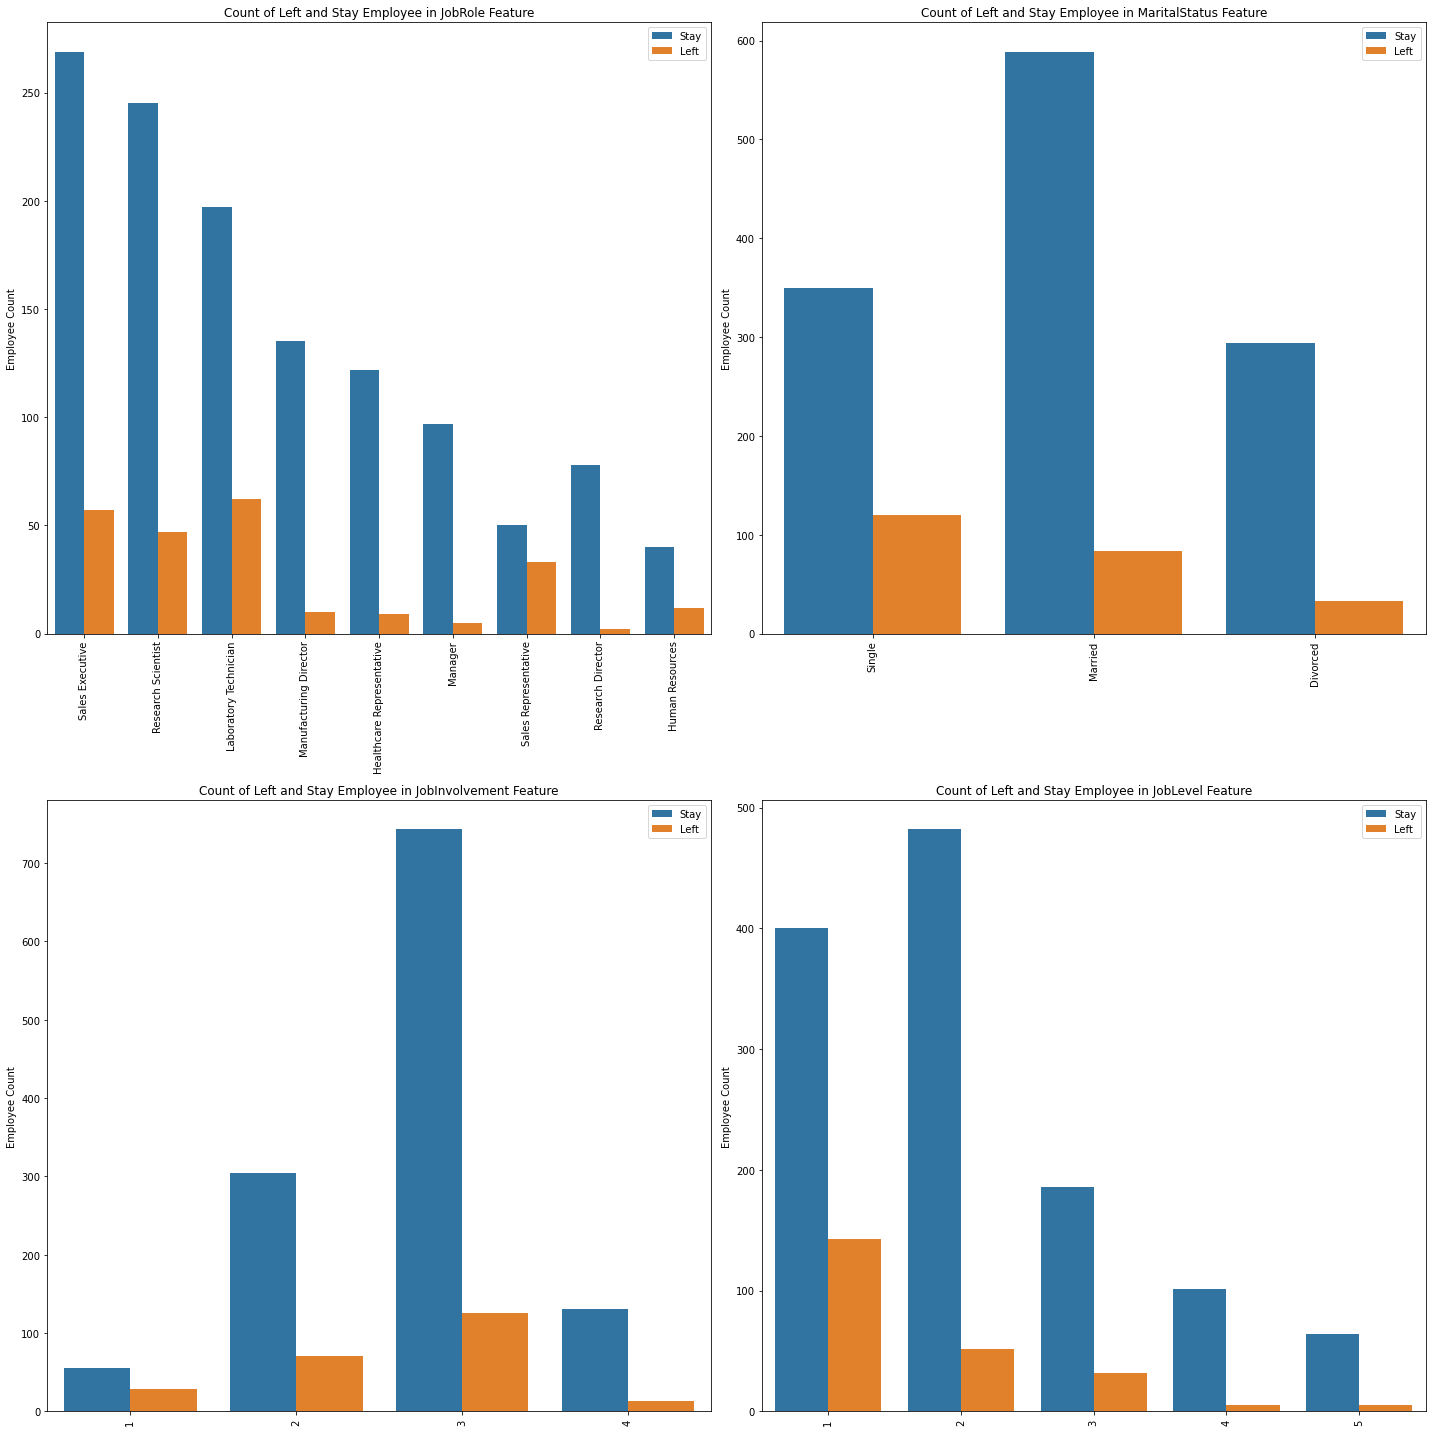

In [18]:
# bivariate plot of categorical features

features = ['JobRole','MaritalStatus', 'JobInvolvement','JobLevel']
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(20,20))

for i, feature in enumerate(features, 1):
    plt.subplot(2,2,i)
    sns.countplot(x=feature, hue='Attrition', data=df_employee)
    
    plt.xlabel(None)
    plt.ylabel('Employee Count')
    plt.xticks(rotation=90)
    
    plt.legend(['Stay','Left'], loc='upper right')
    plt.title('Count of Left and Stay Employee in {} Feature'.format(feature))
    
plt.tight_layout()
plt.show()

Job Role:
1. Almost half of the employee in Sales Representative role left the company, which means this job role has a high turnover
2. Meanwhile Healthcare Representative, Manager, Manufacturing Director, and Research Director role have a very low turnover

Marital Status:
1. Single employees tend to leave a lot more than married/divorced ones

Job Involvement:
1. A lot of employees who had a low job involvement left the company
2. The more involved employees in their job, left percentage is lower

Job Level:
1. The more experienced employees are likely to stay in the company

Text(0.5, 0, 'Distance From Home Feature')

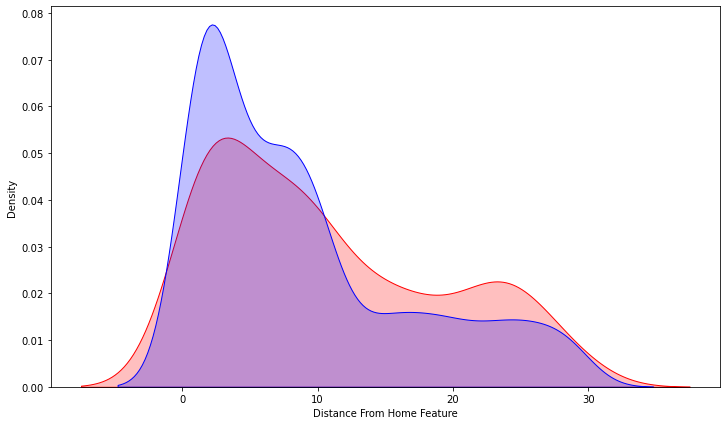

In [19]:
# plot KDE (Kernel Density Estimate) to visualizing the probability density of continous variables

plt.figure(figsize=(12,7))
sns.kdeplot(df_left_employee['DistanceFromHome'],label='Employees who have left', shade=True, color='r')
sns.kdeplot(df_stayed_employee['DistanceFromHome'],label='Employees who stay', shade=True, color='b')

plt.xlabel('Distance From Home Feature')

1. As the distance from home goes up, the number of employees who tend to leave (red) is actually higher than who stay (blue)

Text(0.5, 0, 'Years With the Current Manager Feature')

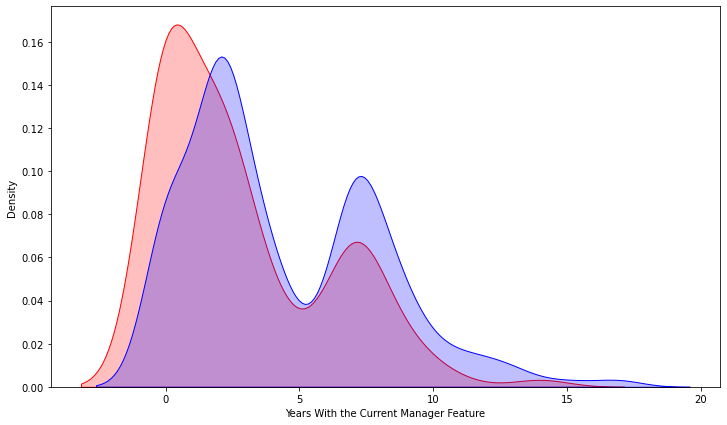

In [20]:
# plot KDE (Kernel Density Estimate) to visualizing the probability density of continous variables

plt.figure(figsize=(12,7))
sns.kdeplot(df_left_employee['YearsWithCurrManager'],label='Employees who have left', shade=True, color='r')
sns.kdeplot(df_stayed_employee['YearsWithCurrManager'],label='Employees who stay', shade=True, color='b')

plt.xlabel('Years With the Current Manager Feature')

1. The less years with the current manager, generally employees tend to leave more

Text(0.5, 0, 'Total Working Years Feature')

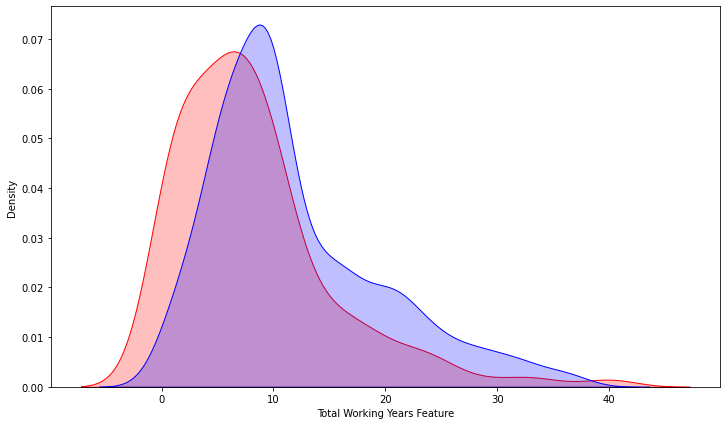

In [21]:
# plot KDE (Kernel Density Estimate) to visualizing the probability density of continous variables

plt.figure(figsize=(12,7))
sns.kdeplot(df_left_employee['TotalWorkingYears'],label='Employees who have left', shade=True, color='r')
sns.kdeplot(df_stayed_employee['TotalWorkingYears'],label='Employees who stay', shade=True, color='b')

plt.xlabel('Total Working Years Feature')

1. The employees tend to stay as the total working years increasing
2. Total working years between 0 and 7, employees tend to leave the company

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Gender'>

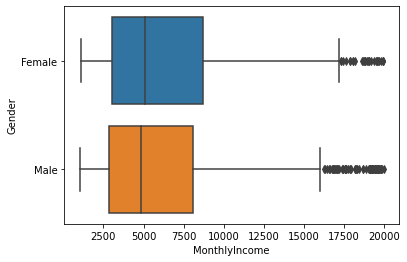

In [22]:
# plot Gender vs MonthlyIncome in boxplot
sns.boxplot(x='MonthlyIncome', y='Gender', data=df_employee)

MonthlyIncome between Gender there's not much difference. Female employees actually get paid even more than the males (maximum value).

<AxesSubplot:xlabel='MonthlyIncome', ylabel='JobRole'>

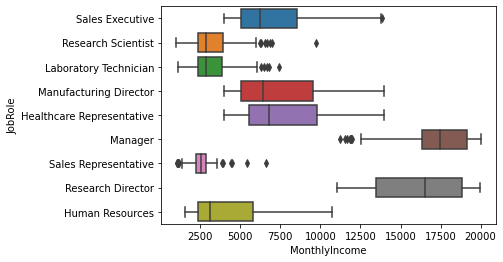

In [24]:
# plot JobRole vs MonthlyIncome in boxplot
sns.boxplot(x='MonthlyIncome', y='JobRole', data=df_employee)

1. Employees who work as Manager tend to get paid a lot more, around 17500 on average
2. Research Director role also has relatively high MonthlyIncome
3. Meanwhile employees who work as Research Scientist, Lab. Technician, and Sales Representative get paid a lot less compared to the Manager and Research Director

### Data Preprocessing

In [30]:
categorical_features = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus']

In [ ]:
#Convert all the non-numeric columns to numerical data types
df_employee = pd.get_dummies(df_employee, columns=categorical_features)

In [39]:
df_employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 51 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int64
 2   DailyRate                          1470 non-null   int64
 3   DistanceFromHome                   1470 non-null   int64
 4   Education                          1470 non-null   int64
 5   EnvironmentSatisfaction            1470 non-null   int64
 6   HourlyRate                         1470 non-null   int64
 7   JobInvolvement                     1470 non-null   int64
 8   JobLevel                           1470 non-null   int64
 9   JobSatisfaction                    1470 non-null   int64
 10  MonthlyIncome                      1470 non-null   int64
 11  MonthlyRate                        1470 non-null   int64
 12  NumCompaniesWorked  

In [50]:
# splitting data
X = df_employee.drop(['Attrition'], axis=1)
y = df_employee['Attrition']

In [51]:
# standardize data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(X)

### Modeling

1. Artificial Neural Network: is simply a bunch of neurons that are connected to each other, and we're trying to build feed forward dense artificial neural network. The process of training is the process of trying to change the value of the weights and optimize it based on the inputs and outputs. We need to find the optimal values of all these weights that are connecting to all the neurons in one certain layer to the neurons in the subsequent layer. The optimal values of weights are the values that could minimize the output error.

2. Logistic Regression Classifier: is an algorithm that implement linear equation with independent variabels to predict a certain value, then convert this value into probability that could range between 0 and 1. The probability is used to classify the inputs into binary output with certain threshold. So basically, Logistic Regression classify two classes based on their probability.

3. Random Forest Classifier: combines the decisions from several trees, and use the majority voting between all these trees. Random Forest Classifier is a type of an ensemble algorithm and it creates a set of decisions. The concept of classification is just take a look at a certain threshold or a cretain condition, then split the data into 2 option decisions.

#### Logistic Regression Classifier

In [55]:
# splitting data into training and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.25, random_state=1)

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [57]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [60]:
y_test_pred = lr.predict(X_test)

Accuracy 86.1413043478261 %


<AxesSubplot:>

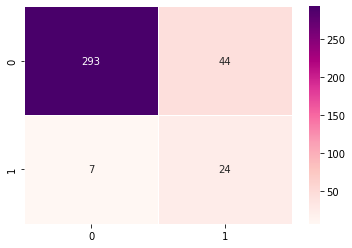

In [62]:
# check testing performance
from sklearn.metrics import confusion_matrix, classification_report

print('Accuracy {} %'.format(100 * accuracy_score(y_test_pred, y_test)))
cm = confusion_matrix(y_test_pred, y_test)
sns.heatmap(cm, annot=True, linewidth=1, cmap='RdPu', fmt='.0f')

In [63]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       300
           1       0.77      0.35      0.48        68

    accuracy                           0.86       368
   macro avg       0.82      0.66      0.70       368
weighted avg       0.85      0.86      0.84       368



#### Random Forest Classifier

In [64]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [65]:
y_test_pred = rfc.predict(X_test)

Accuracy 83.42391304347827 %


<AxesSubplot:>

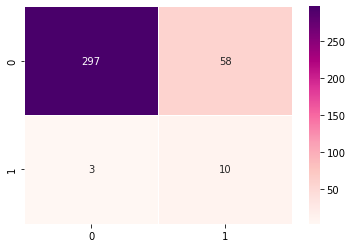

In [66]:
# check testing performance
from sklearn.metrics import confusion_matrix, classification_report

print('Accuracy {} %'.format(100 * accuracy_score(y_test_pred, y_test)))
cm = confusion_matrix(y_test_pred, y_test)
sns.heatmap(cm, annot=True, linewidth=1, cmap='RdPu', fmt='.0f')

In [67]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       300
           1       0.77      0.15      0.25        68

    accuracy                           0.83       368
   macro avg       0.80      0.57      0.58       368
weighted avg       0.82      0.83      0.78       368



#### Deep Learning Model

In [68]:
import tensorflow as tf

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=500, activation='relu', input_shape=(50,)))
model.add(tf.keras.layers.Dense(units=500, activation='relu'))
model.add(tf.keras.layers.Dense(units=500, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [69]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               25500     
                                                                 
 dense_1 (Dense)             (None, 500)               250500    
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dense_3 (Dense)             (None, 1)                 501       
                                                                 
Total params: 527,001
Trainable params: 527,001
Non-trainable params: 0
_________________________________________________________________


In [70]:
model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])

In [71]:
epochs_hist = model.fit(X_train, y_train, epochs=100, batch_size=50)

Epoch 1/100
23/23 [==============================] - 1s 5ms/step - loss: 0.4258 - accuracy: 0.8376
Epoch 2/100
23/23 [==============================] - 0s 8ms/step - loss: 0.3496 - accuracy: 0.8557
Epoch 3/100
23/23 [==============================] - 0s 8ms/step - loss: 0.3022 - accuracy: 0.8929
Epoch 4/100
23/23 [==============================] - 0s 8ms/step - loss: 0.2632 - accuracy: 0.9029
Epoch 5/100
23/23 [==============================] - 0s 6ms/step - loss: 0.2483 - accuracy: 0.9083
Epoch 6/100
23/23 [==============================] - 0s 5ms/step - loss: 0.2205 - accuracy: 0.9129
Epoch 7/100
23/23 [==============================] - 0s 7ms/step - loss: 0.1771 - accuracy: 0.9383
Epoch 8/100
23/23 [==============================] - 0s 7ms/step - loss: 0.1464 - accuracy: 0.9456
Epoch 9/100
23/23 [==============================] - 0s 7ms/step - loss: 0.1513 - accuracy: 0.9456
Epoch 10/100
23/23 [==============================] - 0s 5ms/step - loss: 0.1891 - accuracy: 0.9238
Epoch 11/

In [73]:
y_test_pred = model.predict(X_test)
y_test_pred = (y_test_pred>0.5)

12/12 [==============================] - 0s 3ms/step


Text(0, 0.5, 'Training Loss')

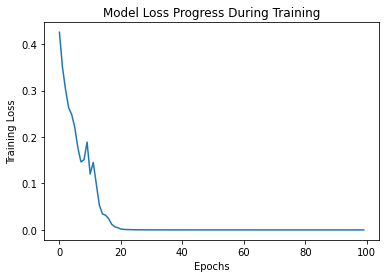

In [75]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')

Text(0, 0.5, 'Training Accuracy')

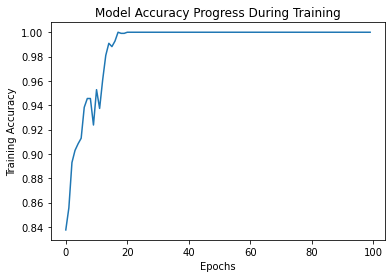

In [76]:
plt.plot(epochs_hist.history['accuracy'])
plt.title('Model Accuracy Progress During Training')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')

<AxesSubplot:>

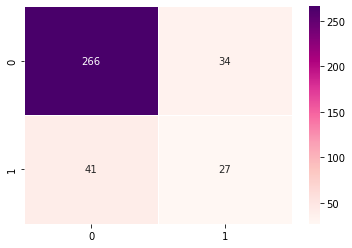

In [77]:
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, linewidth=1, cmap='RdPu', fmt='.0f')

In [78]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       300
           1       0.44      0.40      0.42        68

    accuracy                           0.80       368
   macro avg       0.65      0.64      0.65       368
weighted avg       0.79      0.80      0.79       368



**Model Selection**

1. Since we're dealing with unbalanced data, for model's performance evaluation we're going to use metric f1-score.
2. In this case, the company will give compensation to employees who are more likely to retain. So, it's more important that model has higher accuracy on predicting employees who likely to quit than the otherwise, because if the employees who are predicted as more likely to quit are actually not, the company doesn't have to give them compensation. So, the model that performs the best is Logistic Regression Classifier model, whith f1_score on Class 1 is the highest (48%).